In [1]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     tf.config.experimental.set_memory_growth(gpus[0], True)
#   except RuntimeError as e:
#     # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
#     print(e)

In [2]:
import tensorflow as tf

In [3]:
# tf.debugging.set_log_device_placement(True)

# # 텐서 생성
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

In [4]:
# tf.debugging.set_log_device_placement(True)

# # 텐서를 CPU에 할당
# with tf.device('/CPU:0'):
#   a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#   b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# c = tf.matmul(a, b)
# print(c)

In [5]:
# from tensorflow.python.client import device_lib

# device_lib.list_local_devices()

In [6]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='1'

### 라이브러리 선언

일반 CPU 활용 시

In [7]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [8]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='0'

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14320356503967770690
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2720805635317350085
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1434376601
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4128271411287693238
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9934056937198150028
physical_device_desc: "device: XLA_GPU device"
]


intel gpu 활용 시

In [9]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [10]:
import numpy as np
import mnist
from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [11]:
# import warnings
# warnings.filterwarnings(action="ignore")

# 데이터 불러오기

In [12]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_images.shape) # (10000, 28, 28)
print(test_labels.shape) # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


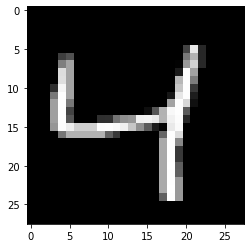

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

one_char = pd.DataFrame(train_images[2])
plt.imshow(train_images[2],cmap="gray")

# 1. 타입 통합 / 특성 숫자컬럼 추가

### skip

# 2. 데이터 분리

In [14]:
# 이미지 정규화
train_images = (train_images / 255)
test_images = (test_images / 255)

# 이미지 형태 변경 (향후 CNN 시 차원 DEPTH 추가 필요)
# train_images = train_images.reshape((len(train_images),28,28))
# test_images = test_images.reshape((len(test_images),28,28))

print(train_images.shape) # (60000, 28, 28)
print(test_images.shape)  # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  4
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 3. 모델 생성

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

### 입출력 형태 정의
input_shape = train_images[0].shape
nclasses = len(np.unique(train_labels))

model = Sequential()
#input Layer
model.add(Flatten(input_shape=input_shape))
#Hidden Layer-1
model.add(Dense(units=8, activation='relu'))
#Hidden Layer-2
model.add(Dense(units=8, activation='relu'))
#Output layer
model.add(Dense(units=nclasses,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


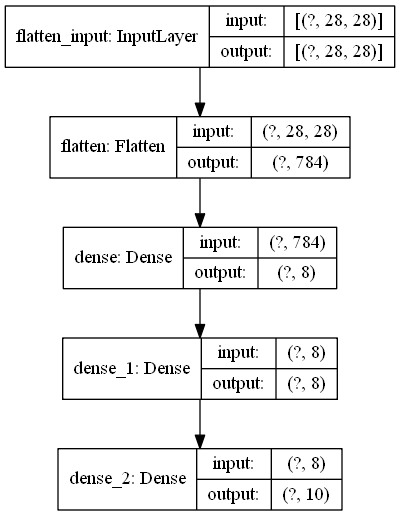

In [17]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)
# from IPython.display import Image
# Image(retina=True, filename='model_plot.png')


# 4. 모델 컴파일

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 5. 모델 훈련

In [19]:
import os
from datetime import datetime

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

datetime.now().strftime("%Y%m%d_%H%M%S")

logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

callbacks = [
    
    TensorBoard(
    log_dir = logdir),
    
    EarlyStopping(monitor="val_loss", patience=10),
    
    ModelCheckpoint(filepath="model_mnist_weights.h5", 
                    monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]

In [20]:
history = model.fit(train_images,
                         train_labels_one_hot,
                         epochs=10,
                         batch_size=32,
                         callbacks=callbacks,
                         validation_split=0.2)

Epoch 1/10
1491/1500 [============================>.] - ETA: 0s - loss: 0.7068 - accuracy: 0.7809
Epoch 00001: val_accuracy improved from -inf to 0.89975, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7049 - accuracy: 0.7816 - val_loss: 0.3472 - val_accuracy: 0.8997
Epoch 2/10
1496/1500 [============================>.] - ETA: 0s - loss: 0.3347 - accuracy: 0.9046
Epoch 00002: val_accuracy improved from 0.89975 to 0.91225, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.9046 - val_loss: 0.2950 - val_accuracy: 0.9122
Epoch 3/10
1498/1500 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.9163
Epoch 00003: val_accuracy improved from 0.91225 to 0.92192, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2974 - accuracy: 0.9162 - val_loss: 0.2710 - val_accuracy: 0.9219
Epoch 4/10
14

In [21]:
# 텐서를 CPU에 할당
# with tf.device('/GPU:0'):
#     history = model.fit(train_images,
#                          train_labels_one_hot,
#                          epochs=10,
#                          batch_size=32,
#                          callbacks=callbacks,
#                          validation_split=0.2)

# 6. 모델 추론

In [22]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.9288


[0.2589881718158722, 0.9287999868392944]

### [실습]
Img_5.jpg 파일을 불러와서 예측하세요
testimg = cv2.imread(“./img_5.jpg”, cv2.IMREAD_GRAYSCALE)
testimg = testimg.reshape(1,28,28)

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
import cv2

In [25]:
testImg = cv2.imread("./img_5.jpg", cv2.IMREAD_GRAYSCALE)

In [26]:
testImg = testImg.astype(float)

In [27]:
testImg = testImg/255.0

In [28]:
testImg = testImg.reshape(1,28,28)

In [29]:
answer = model.predict(testImg)

In [30]:
np.argmax(answer)

3

# GPU 메모리 해제

In [31]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()